<a href="https://colab.research.google.com/github/doissegundos/COVID-19-World-Vaccination-Progress/blob/main/vacina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração 

https://www.kaggle.com/gpreda/covid-world-vaccination-progress/code


Bibliotecas utilizadas

In [156]:
from google.colab import drive
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importando o dataset do drive

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/doissegundos/COVID-19-World-Vaccination-Progress/main/country_vaccinations.csv')

Visualizando as 7 primeiras instancias do dataset

In [158]:
print('Quantidade de instâncias: {}\nQuantidade de atributos: {}\n'.format(len(df), len(df.columns)))
df[0:7]

Quantidade de instâncias: 8451
Quantidade de atributos: 15



,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


Cada coluna do Dataset representa uma pergunta da pesquisa

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8451 non-null   object 
 1   iso_code                             8451 non-null   object 
 2   date                                 8451 non-null   object 
 3   total_vaccinations                   5231 non-null   float64
 4   people_vaccinated                    4688 non-null   float64
 5   people_fully_vaccinated              3186 non-null   float64
 6   daily_vaccinations_raw               4415 non-null   float64
 7   daily_vaccinations                   8260 non-null   float64
 8   total_vaccinations_per_hundred       5231 non-null   float64
 9   people_vaccinated_per_hundred        4688 non-null   float64
 10  people_fully_vaccinated_per_hundred  3186 non-null   float64
 11  daily_vaccinations_per_million

##### Paises que estão nesse dataset

In [160]:
df["country"] = df["country"].astype('str') #converte as instancias para o tipo str
data = df["country"]

In [161]:
data = data.value_counts().to_frame().reset_index()
paises = list(data['index'])
paises_qauntidade_dias = list(data['country'])

In [164]:
print("Quantidade de paises: "+ str(len(paises)))
print("Os paises são: ")
#paises

Quantidade de paises: 154
Os paises são: 


##### Total de vacinação por pais

In [165]:
pais = "United States"
country = df[df.country == pais]

In [166]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 8146 to 8243
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              98 non-null     object 
 1   iso_code                             98 non-null     object 
 2   date                                 98 non-null     object 
 3   total_vaccinations                   84 non-null     float64
 4   people_vaccinated                    83 non-null     float64
 5   people_fully_vaccinated              69 non-null     float64
 6   daily_vaccinations_raw               74 non-null     float64
 7   daily_vaccinations                   97 non-null     float64
 8   total_vaccinations_per_hundred       84 non-null     float64
 9   people_vaccinated_per_hundred        83 non-null     float64
 10  people_fully_vaccinated_per_hundred  69 non-null     float64
 11  daily_vaccinations_per_millio

Numero de vacinas aplicadas no pais

In [168]:
total_vac = country['total_vaccinations'].value_counts().to_frame().reset_index()
numero_vacinas_aplicadas = total_vac['index'].sum()

Dias de vacinação

In [169]:
dias_vac = country.query("daily_vaccinations != 'nan' & date != 'nan'")

In [170]:
mes = 2
dias_vac['date'] = pd.to_datetime(dias_vac['date'], format='%Y-%m-%d')
mes_vac = dias_vac[dias_vac.date.dt.month == mes]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [171]:
mes_vac
vaccines = mes_vac['vaccines'].value_counts().to_frame().reset_index()
vaccines = list(vaccines['index'])

source_website = mes_vac['source_website'].value_counts().to_frame().reset_index()
source_website = list(source_website['index'])

In [173]:
f_label = list(mes_vac.date.dt.day)

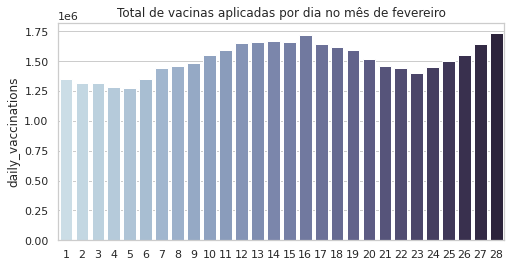

In [198]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(x=f_label, y="daily_vaccinations", data = mes_vac, palette="ch:s=.25,rot=-.25")
plt.title('Total de vacinas aplicadas por dia no mês') 
plt.show()